In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [46]:
def get_data(filename):
    images = []
    labels = []
    with open(filename) as training_file:
      # Your code starts here
        #images = np.array([])
        #labels = np.array([])
        images = []
        labels = []
        #skip first row.
        training_file.readline()
        for count,row in enumerate(training_file):
            row = row.split(",")
            label = np.array(row[0]).astype(np.float)
            image_string = np.array(row[1:785]).astype(np.float)
            
            image = np.array_split(image_string, 28)
            
            label = np.array(label) 
            image = np.array(image) 
            
            labels = np.append(labels, label)
            images.append(image)
                
                
        labels = np.array(labels).astype(float)
        images = np.array(images).astype(float)
                
      # Your code ends here
    return images, labels


path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [51]:
# Adding another dimension to the data

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255. )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [74]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(25, activation='softmax')
])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels), 
                              validation_data = validation_datagen.flow(testing_images, testing_labels),
                              epochs=3, verbose = 1)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/3
858/858 [==============================] - 80s 94ms/step - loss: 2.7623 - accuracy: 0.1632 - val_loss: 2.1012 - val_accuracy: 0.3207
Epoch 2/3
858/858 [==============================] - 85s 99ms/step - loss: 2.1123 - accuracy: 0.3319 - val_loss: 1.3195 - val_accuracy: 0.5753
Epoch 3/3
858/858 [==============================] - 85s 99ms/step - loss: 1.7315 - accuracy: 0.4406 - val_loss: 0.8475 - val_accuracy: 0.7086


[211.47073514037336, 0.4090909]

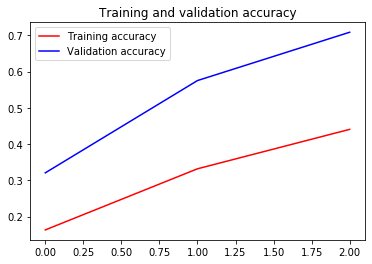

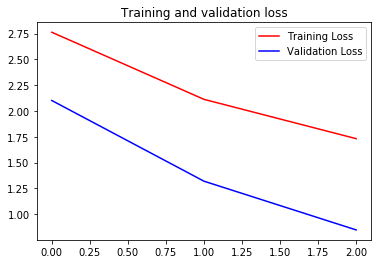

In [77]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()